In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# Data Processing
liver_df = pd.read_csv("../data/liver_cirrhosis.csv")

liver_df = liver_df.iloc[0:20001]

# Define numerical and binary columns
num_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
binary_cols = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders']

# Convert categorical columns to numerical
liver_df['Sex'] = liver_df['Sex'].map({'M': 0, 'F': 1})
liver_df['Ascites'] = liver_df['Ascites'].map({'N': 0, 'Y': 1})
liver_df['Hepatomegaly'] = liver_df['Hepatomegaly'].map({'N': 0, 'Y': 1})
liver_df['Spiders'] = liver_df['Spiders'].map({'N': 0, 'Y': 1})
liver_df['Edema'] = liver_df['Edema'].map({'N': 0, 'S': 1, 'Y': 2})
liver_df['Status'] = liver_df['Status'].astype('category').cat.codes
liver_df['Drug'] = liver_df['Drug'].astype('category').cat.codes

# Remove duplicates
liver_df.drop_duplicates(inplace=True)

# Filter outliers
liver_df = liver_df[liver_df['N_Days'] <= 3000]
liver_df = liver_df[liver_df['Age'] <= 22500]
liver_df = liver_df[liver_df['Bilirubin'] <= 5]
liver_df = liver_df[liver_df['Cholesterol'] <= 500]
liver_df = liver_df[(liver_df['Albumin'] >= 3) & (liver_df['Albumin'] <= 4)]
liver_df = liver_df[liver_df['Copper'] <= 400]
liver_df = liver_df[liver_df['Alk_Phos'] <= 2000]
liver_df = liver_df[liver_df['SGOT'] <= 350]
liver_df = liver_df[liver_df['Tryglicerides'] <= 400]
liver_df = liver_df[liver_df['Platelets'] <= 300]
liver_df = liver_df[liver_df['Prothrombin'] <= 16]

In [7]:
# Splitting the data
X = liver_df.drop('Stage', axis=1)
y = liver_df['Stage']

# Ensure labels are within the valid range
print("Unique target values before adjustment:", y.unique())
if y.max() >= 3:
    y = y - 1
print("Unique target values after adjustment:", y.unique())

# Perform stratified sampling to maintain the distribution of classes in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Unique target values before adjustment: [2 1 3]
Unique target values after adjustment: [1 0 2]


Epoch 1/100
222/222 [==============================] - 2s 5ms/step - loss: 0.9519 - accuracy: 0.5396 - val_loss: 0.8832 - val_accuracy: 0.5683
Epoch 2/100
222/222 [==============================] - 1s 3ms/step - loss: 0.8461 - accuracy: 0.6072 - val_loss: 0.8494 - val_accuracy: 0.6133
Epoch 3/100
222/222 [==============================] - 1s 3ms/step - loss: 0.7866 - accuracy: 0.6500 - val_loss: 0.8271 - val_accuracy: 0.6259
Epoch 4/100
222/222 [==============================] - 1s 3ms/step - loss: 0.7531 - accuracy: 0.6680 - val_loss: 0.8066 - val_accuracy: 0.6367
Epoch 5/100
222/222 [==============================] - 1s 3ms/step - loss: 0.7076 - accuracy: 0.6977 - val_loss: 0.8091 - val_accuracy: 0.6547
Epoch 6/100
222/222 [==============================] - 1s 3ms/step - loss: 0.6775 - accuracy: 0.7171 - val_loss: 0.7776 - val_accuracy: 0.6673
Epoch 7/100
222/222 [==============================] - 1s 3ms/step - loss: 0.6476 - accuracy: 0.7279 - val_loss: 0.7945 - val_accuracy: 0.6637

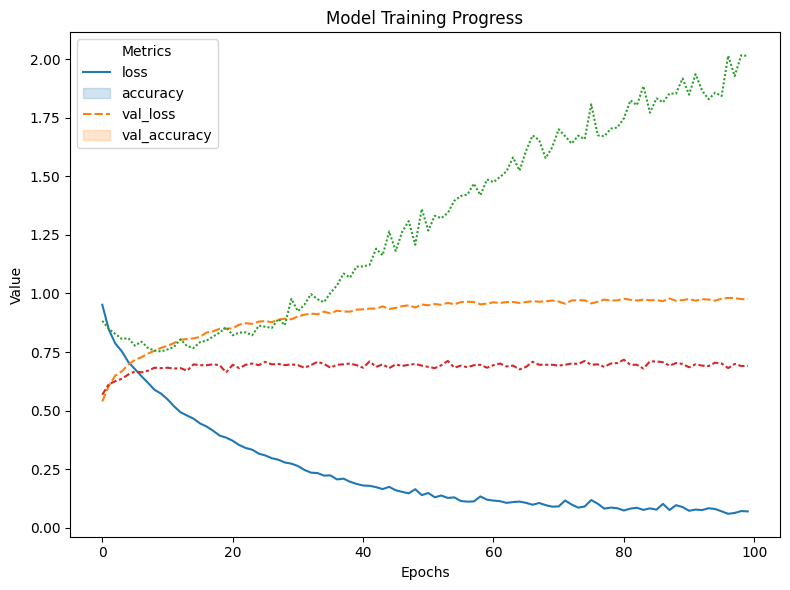

18/18 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       162
           1       0.67      0.66      0.66       210
           2       0.80      0.73      0.76       184

    accuracy                           0.69       556
   macro avg       0.69      0.69      0.69       556
weighted avg       0.70      0.69      0.69       556



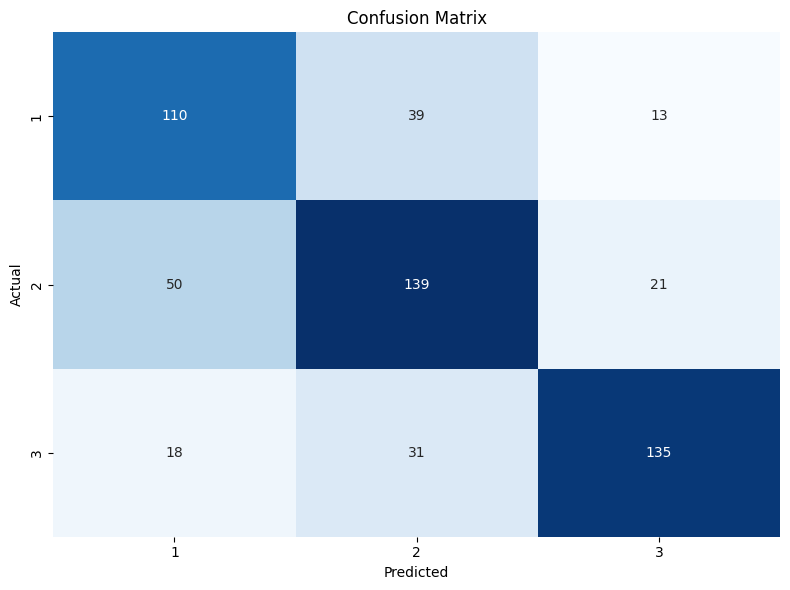

In [8]:
# Building the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for the target

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Plotting training history
plt.figure(figsize=(8, 6))
sns.lineplot(data=history.history)
plt.title("Model Training Progress")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend(labels=history.history.keys(), title='Metrics')
plt.tight_layout()
plt.show()

# Making predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()